<center> <font size=6> Image Classification Using CNNs on the CIFAR-10 Dataset

### Problem Statement

To build an image classification model that can efficiently classify images from the CIFAR-10 dataset, which has 60,000 color images sized 32x32 split into 10 categories (6,000 images for each category), is the goal of this project. The dataset contains 50,000 training images and 10,000 testing images. The classes include common objects like airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.  

Compressing images into small 32x32 pixel images leads to multiple issues such as intra-class variation, inter-class similarity, limited spatial features due to small image size, and background noise. Hence, the challenge here is to construct a model capable of learning intricate patterns vis-a-vis the dataset’s simplicity and noise.



### Expected Outcome

The end goal is to develop a model that not only achieves high classification accuracy but also serves as a baseline or benchmark for more complex image classification tasks. Success in this task has broader implications for real-world applications such as autonomous vehicles, medical image diagnosis, and intelligent surveillance systems.

### Task

Convolutional Neural Networks (CNNs)—to extract spatial hierarchies of features from the image data. Model performance will be measured using metrics such as accuracy, precision, recall, and confusion matrix analysis.

### Source of DataSet

https://keras.io/api/datasets/cifar10/

The CIFAR-10 data set has a total of 60,000 images across ten classes, each containing 6000 images. The separate test set has 10,000 images as well, among which there are 1,000 samples from each of the ten classes which makes up the 10,000 images.CIFAR 10 consists of 60000 32X32 color images and has 50000 training images with 10000 test images.  

In like manner as with the training set, the train set is split into five random batches and one random test batch. Each containing 10000 images each. Each class has at least 5000 images and all the images from the different classes are added to the rest in random order. It is possible that some classes may contain more images than others.  

airplane, automobile, bird, cat,  deer,  dog,  frog, horse,  truck, ship



Number of classes: 10
Image size: 32x32
total Images: 50000 training + 10000 test= 60000


airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck

### Importing Necessary Libraries

In [ ]:
import tensorflow as tf
import keras
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
import numpy as np
import math
import time
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
if tf.config.list_physical_devices('GPU'):
    print("TensorFlow is using the GPU.")
else:
    print("TensorFlow is using the CPU.")

TensorFlow is using the GPU.


### Uploading the Dataset, Exploring and Splitting for train and test

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)
print("Number of training samples:", x_train.shape[0])
print("Number of test samples:", x_test.shape[0])
print("Image dimensions:", x_train.shape[1:])

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Number of training samples: 50000
Number of test samples: 10000
Image dimensions: (32, 32, 3)


## 3 means RGB

In [ ]:
class_images_dict = {}
for i in range(10):
        class_images_dict[i] = x_train[y_train[:, 0] == i]

### Image Visualization

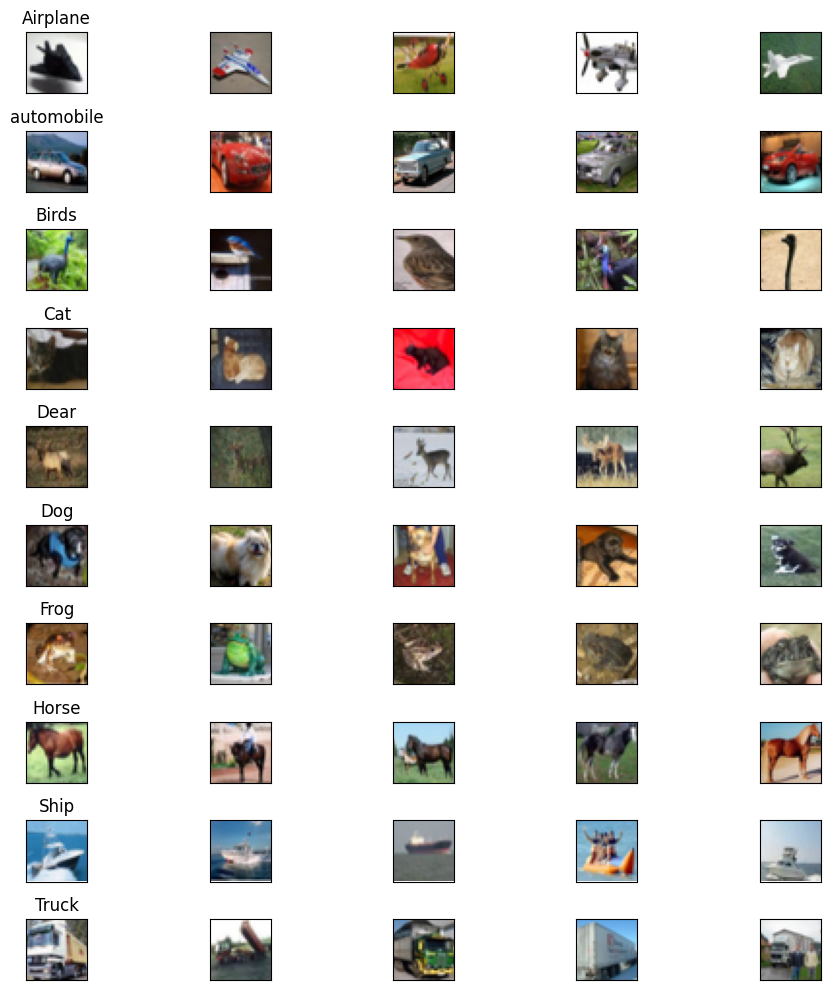

In [ ]:
plt.figure(figsize=(10, 10))
original_class_names = ['Airplane', 'automobile', 'Birds', 'Cat', 'Dear',
                        'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

for class_label in range(10):

    current_class_name = original_class_names[class_label]
    images_to_plot = class_images_dict[class_label][:5]

    for i in range(5):
        plt.subplot(10, 5, class_label * 5 + i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images_to_plot[i], cmap=plt.cm.binary)
        if i == 0:

            plt.title(current_class_name)

plt.tight_layout()
plt.show()

## Counting unique class

In [ ]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


## Reshaping

In [ ]:
x_train = x_train.reshape(-1, 32, 32, 3)

## Regularization

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

### Using Models and Adding Layers

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),

    layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation="elu", padding="same"),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation="elu", padding="same"),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='elu'),
    layers.BatchNormalization(),

    layers.Dropout(0.5),


    layers.Dense(10, activation="sigmoid"),
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,610 (2.08 MB)

 Trainable params: 545,354 (2.08 MB)

 Non-trainable params: 256 (1.00 KB)

### Training the Model

In [ ]:
path_checkpoint = "model_checkpoint.weights.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_accuracy", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_accuracy",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)

start_time = time.time()
history = model.fit(
    x_train,
    y_train_one_hot,
    epochs=100,
    callbacks=[es_callback, modelckpt_callback],
    validation_split=0.2
)
end_time = time.time()
total_time = end_time - start_time
print(f"Total training time: {total_time} seconds")

Epoch 1/100
1241/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3895 - loss: 1.8015
Epoch 1: val_accuracy improved from -inf to 0.44620, saving model to model_checkpoint.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.3902 - loss: 1.7990 - val_accuracy: 0.4462 - val_loss: 1.6688
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6021 - loss: 1.1509
Epoch 2: val_accuracy improved from 0.44620 to 0.66040, saving model to model_checkpoint.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6021 - loss: 1.1509 - val_accuracy: 0.6604 - val_loss: 0.9727
Epoch 3/100
1245/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6533 - loss: 0.9982
Epoch 3: val_accuracy did not improve from 0.66040
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6533 - loss: 0.9983 - val_accuracy: 0.4961 - val_loss: 1.5073
Epoch 4/100
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6827 - loss: 0.9159
Epoch 4: val_accuracy improved from 0

### Comparing 10 different models

<table border="1" cellspacing="0" cellpadding="5">
  <thead>
    <tr>
      <th>Changes</th>
      <th>Accuracy</th>
      <th>Loss</th>
      <th>Val Acc</th>
      <th>Val Loss</th>
      <th>Time</th>
      <th>Epochs</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>Best model</td><td>88.53%</td><td>32.71%</td><td>70.72%</td><td>11.58%</td><td>182s</td><td>24</td></tr>
    <tr><td>Adding a convolutional layer 128</td><td>41.59%</td><td>57.23%</td><td>23.77%</td><td>19.22%</td><td>85s</td><td>8</td></tr>
    <tr><td>Removing dropout 0.5</td><td>93.87%</td><td>18.23%</td><td>68.18%</td><td>35.97%</td><td>141s</td><td>18</td></tr>
    <tr><td>Output dense layer from softmax to sigmoid and using relu</td><td>74.29%</td><td>74.25%</td><td>69.29%</td><td>91.58%</td><td>112s</td><td>15</td></tr>
    <tr><td>Remove batch normalisation</td><td>57.60%</td><td>97.46%</td><td>59.08%</td><td>13.58%</td><td>107s</td><td>15</td></tr>
    <tr><td>Adding dense layer 64</td><td>82.22%</td><td>52.95%</td><td>70.39%</td><td>97.48%</td><td>104s</td><td>13</td></tr>
    <tr><td>Adding dense layer 256</td><td>83.25%</td><td>49.02%</td><td>49.23%</td><td>41.04%</td><td>139s</td><td>17</td></tr>
    <tr><td>Removing padding</td><td>83.20%</td><td>47.91%</td><td>69.93%</td><td>95.06%</td><td>139s</td><td>21</td></tr>
    <tr><td>Using softmax from sigmoid</td><td>83.34%</td><td>47.09%</td><td>70.51%</td><td>97.28%</td><td>186s</td><td>27</td></tr>
    <tr><td>Kernal size 2x2 from 3x3</td><td>77.57%</td><td>64.05%</td><td>66.51%</td><td>99.97%</td><td>97s</td><td>13</td></tr>
  </tbody>
</table>




Minimum Validation Loss: 0.8466
Maximum Validation Accuracy: 0.7285


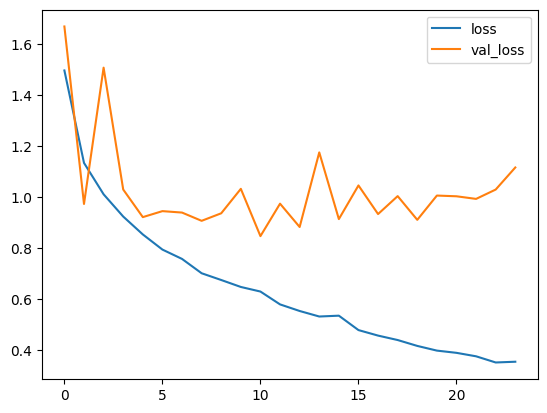

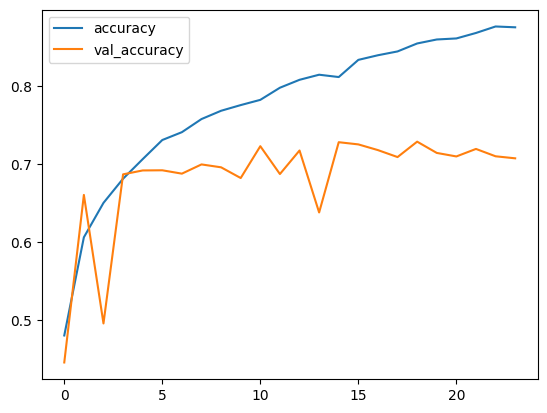

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
print("Maximum Validation Accuracy: {:0.4f}".format(history_df['val_accuracy'].max()))


In [ ]:
print("Maximum Validation Accuracy: {:0.4f}".format(history_df['val_accuracy'].max()))

Maximum Validation Accuracy: 0.7285


In [ ]:


x_test = x_test.reshape(-1, 32, 32, 3)


y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10)


test_loss, test_acc = model.evaluate(x_test, y_test_one_hot, verbose=0)

print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

Test loss: 1.1039
Test accuracy: 0.7063


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


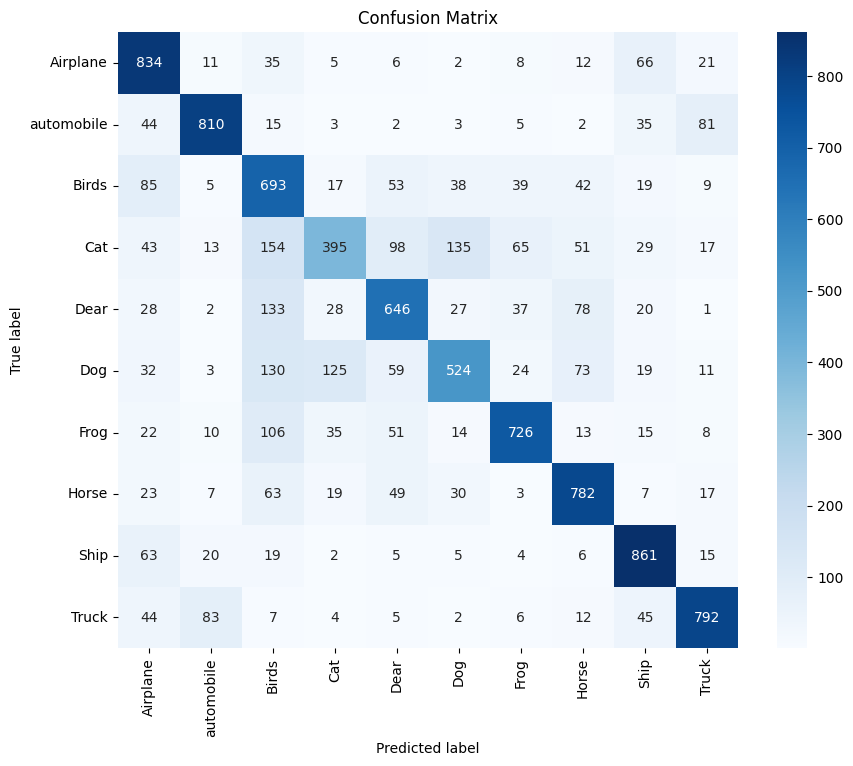

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=original_class_names, yticklabels=original_class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


### Report

In [ ]:
print(classification_report(y_test, y_pred, target_names=original_class_names))


              precision    recall  f1-score   support

    Airplane       0.68      0.83      0.75      1000
  automobile       0.84      0.81      0.82      1000
       Birds       0.51      0.69      0.59      1000
         Cat       0.62      0.40      0.48      1000
        Dear       0.66      0.65      0.65      1000
         Dog       0.67      0.52      0.59      1000
        Frog       0.79      0.73      0.76      1000
       Horse       0.73      0.78      0.76      1000
        Ship       0.77      0.86      0.81      1000
       Truck       0.81      0.79      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



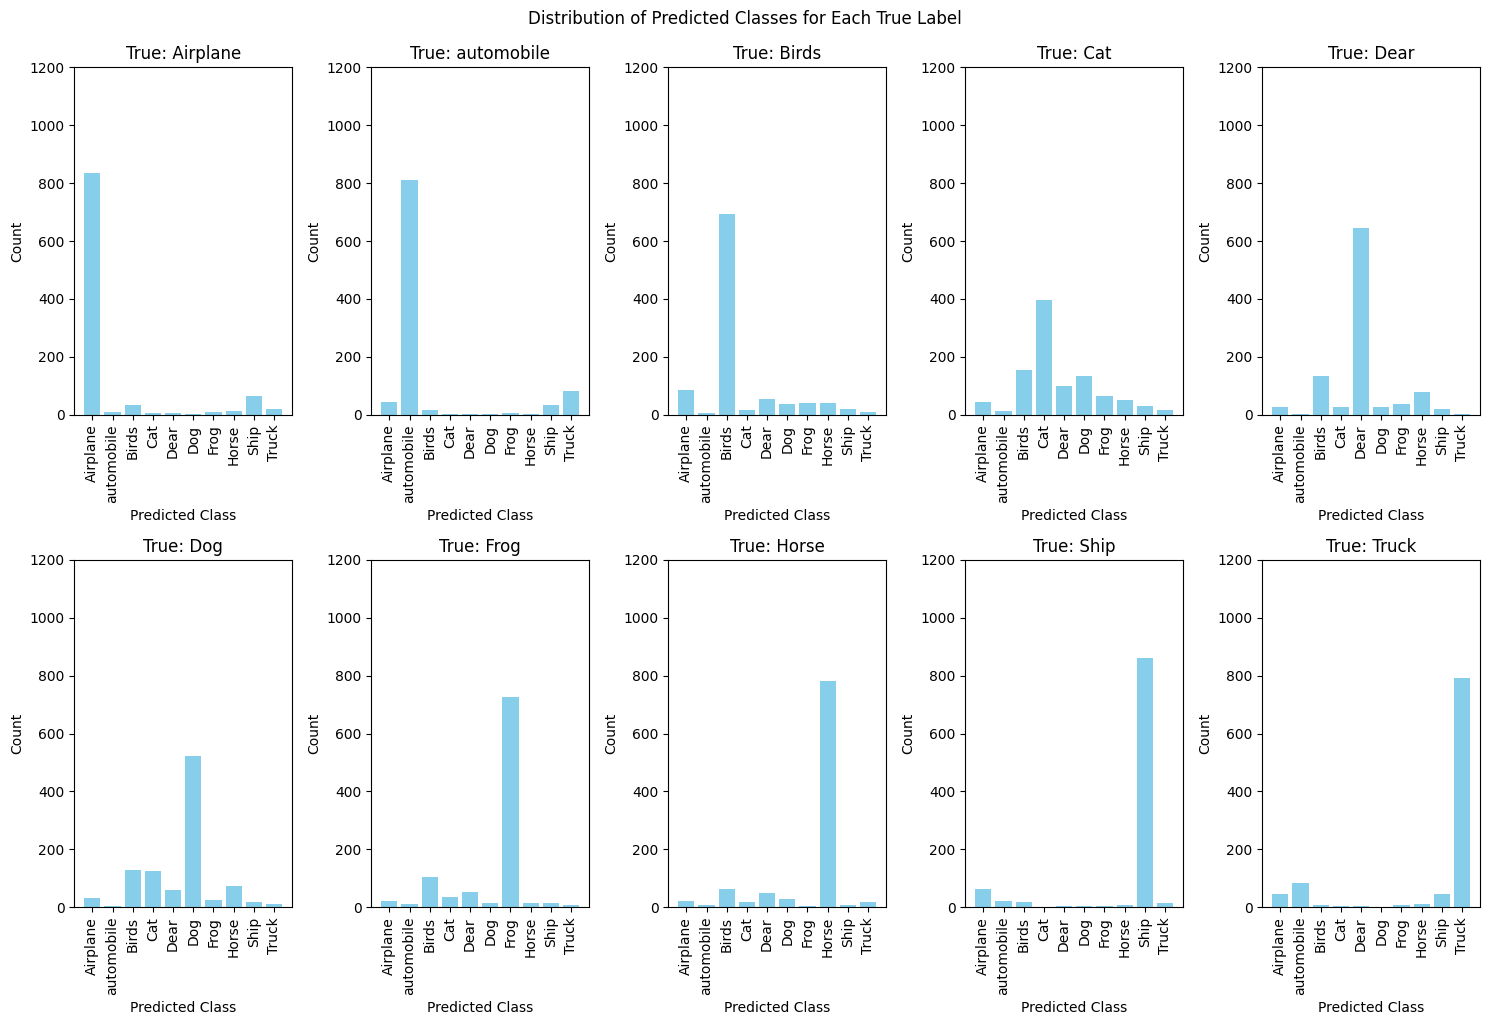

In [ ]:
pred_distribution = {}
for i in range(10):
  pred_distribution[i] = {}
  indices_for_true_class = np.where(y_test == i)[0]
  predicted_labels_for_true_class = y_pred[indices_for_true_class]
  unique, counts = np.unique(predicted_labels_for_true_class, return_counts=True)
  for pred_label, count in zip(unique, counts):
    pred_distribution[i][pred_label] = count

plt.figure(figsize=(15, 10))

for true_label in range(10):
  plt.subplot(2, 5, true_label + 1)
  predicted_counts = pred_distribution[true_label]
  all_pred_labels = range(10)
  counts = [predicted_counts.get(pred_label, 0) for pred_label in all_pred_labels]
  plt.bar(all_pred_labels, counts, color='skyblue')
  plt.xticks(all_pred_labels, original_class_names, rotation=90)
  plt.title(f'True: {original_class_names[true_label]}')
  plt.xlabel('Predicted Class')
  plt.ylabel('Count')
  plt.ylim(0, 1200)

plt.tight_layout()
plt.suptitle('Distribution of Predicted Classes for Each True Label', y=1.02)
plt.show()
